In [1]:
# import DMeRates
import DMeRates.DMeRate as DMeRate
import torch
import numericalunits as nu
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True  # Enable LaTeX
params = {'text.usetex' : True,
            'font.size' : 12,
            'font.family' : 'cmr10',
            'figure.autolayout': True
            }
plt.rcParams.update(params)
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['axes.labelsize']=10

In [2]:
FDMn = 2

halo_model = 'shm'
DoScreen = False
test_mX = 10. #MeV
test_mX_eV = test_mX*1e6
test_mX_unitized= test_mX * nu.MeV / nu.c0**2
ne = 1
cs = 1e-36
cs_unitized = cs * nu.cm**2
nes = [1,2,3,4,5,6,7,8,9,10]
mX_array = np.concatenate((np.arange(0.2,0.8,0.025),np.array([0.9]),np.arange(1,5,0.05),np.arange(5,11,1),np.array([20,50,100,200,500,1000,10000]))) #MeV


In [3]:
from QCDark.dark_matter_rates import d_rate,default_screening,default_si,read_output,default_astro
default_astro['sigma_e'] = cs

from QCDark.dark_matter_rates import form_factor as qcdark_form_factor



if DoScreen:
    screening = default_si
else:
    screening = default_screening
cff = read_output('QCDark/results/Si_final.hdf5')
Ee_old, dR_old= d_rate(test_mX_eV, cff, FDM_exp = FDMn, screening = screening, astro_model = default_astro)

from QEDark.QEDark2 import QEDark
qedark = QEDark()

Ee_qe = np.arange(0,50,0.1)
drde_qedark = qedark.vectorized_dRdE('Si',test_mX_eV,Ee_qe,FDMn,'imb',DoScreen=DoScreen)


import DMeRates
import DMeRates.DMeRate
dmrates = DMeRate.DMeRate('Si',QEDark=False)
dmrates_qedark = DMeRate.DMeRate('Si',QEDark=True)
dmrates.update_crosssection(cs)
dmrates_qedark.update_crosssection(cs)



dmrates_qedark.setup_halo_data(test_mX,FDMn,'shm')
dmrates.setup_halo_data(test_mX,FDMn,'shm')

# drde_qcdark_redo_res = dmrates.vectorized_dRdE(test_mX,FDMn,halo_model,DoScreen=DoScreen,integrate=True,unitize=True,debug=True) 
drde_qedark_redo = dmrates_qedark.vectorized_dRdE(test_mX,FDMn,'imb',DoScreen=DoScreen,integrate=False,unitize=True,debug=False).cpu().numpy()
drde_qcdark_redo_res = dmrates.vectorized_dRdE(test_mX,FDMn,'shm',DoScreen=DoScreen,integrate=True,unitize=True,debug=True) 
dmrates.setup_halo_data(test_mX,FDMn,'modulated',isoangle=35,useVerne=True)
drde_qcdark_redo_mod_res = dmrates.vectorized_dRdE(test_mX,FDMn,'modulated',DoScreen=DoScreen,integrate=True,unitize=True,debug=True) 
drde_qcdark_redo_mod = drde_qcdark_redo_mod_res['drde'].cpu().numpy()
drde_qcdark_redo = drde_qcdark_redo_res['drde'].cpu().numpy()
Earr = dmrates.Earr.cpu().numpy()
Earr /= nu.eV

Earr_qedark = dmrates_qedark.Earr.cpu().numpy()
Earr_qedark /= nu.eV

CUDA GPU found, performing calculations on GPU
Using form factor calculated from file: c:\Users\Ansh\Projects\DarkMatterRates\DMeRates\../QCDark/results/Si_final.hdf5
CUDA GPU found, performing calculations on GPU


c:\Users\Ansh\anaconda3\envs\dmerates\Lib\site-packages\torch\__init__.py:1236: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\tensor\python_tensor.cpp:436.)
  _C._set_default_tensor_type(t)
c:\Users\Ansh\anaconda3\envs\dmerates\Lib\site-packages\torchquad\integration\simpson.py:76: UserWarning: N per dimension cannot be even due to necessary subdivisions. N per dim will now be changed to the next lower integer, i.e. 1250 -> 1249.
  warnings.warn(
c:\Users\Ansh\anaconda3\envs\dmerates\Lib\site-packages\torch\functional.py:539: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\native\TensorShape.cpp:3638.)
  return _VF.meshgrid(tensors, **kwargs)  # ty

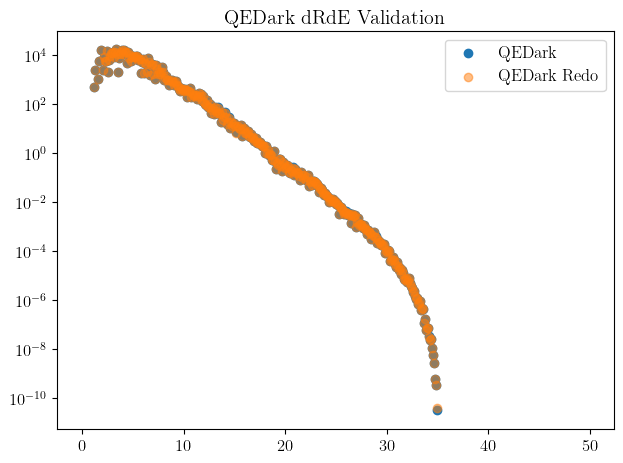

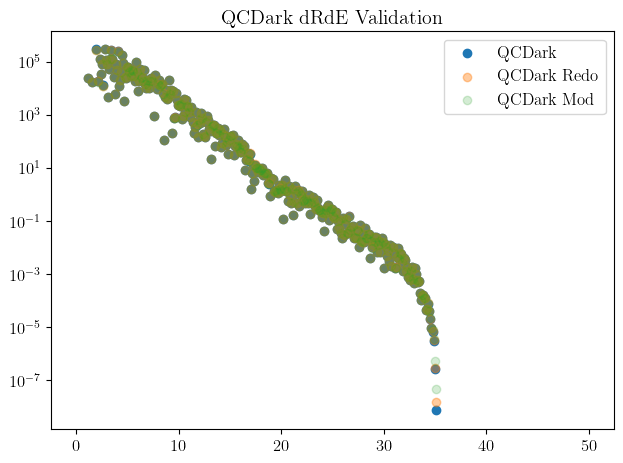

In [4]:


plt.scatter(Earr_qedark,drde_qedark,label='QEDark')
plt.scatter(Earr_qedark,drde_qedark_redo,label='QEDark Redo',alpha=0.5)
plt.yscale('log')
plt.legend()
plt.title('QEDark dRdE Validation')
plt.show()
plt.close()

plt.scatter(Ee_old,dR_old,label='QCDark')
plt.scatter(Earr,drde_qcdark_redo,label='QCDark Redo',alpha=0.4)
plt.scatter(Earr,drde_qcdark_redo_mod,label='QCDark Mod',alpha=0.2)

plt.yscale('log')
plt.legend()
plt.title('QCDark dRdE Validation')
plt.show()
plt.close()




In [5]:
# 

In [6]:
# from QCDark.dark_matter_rates import d_rate_FanoQ,d_rate_RamanathanQ

# ionizationFile = 'DMeRates/p100k.dat'
# ionization_model = 'R'

# Si_ff = qcdark_form_factor('QCDark/results/Si_final.hdf5')
# from QEDark.QEDark2 import QEDark
# qedark = QEDark()
# qedark_step= QEDark()
# qedark_step.change_to_step()

# qcdark_results = []
# qedark_results = []
# qcdark_results_step = []
# qedark_results_step = []

# for mX in mX_array: #MeV
#     qcdarkeresult = d_rate_RamanathanQ(mX*1e6, Si_ff, ionizationFile, FDM_exp = FDMn, screening = screening, astro_model = default_astro)
#     qcdarkeresult = qcdarkeresult[1][ne]
#     qcdark_results.append(qcdarkeresult)

#     qcdarkeresultstep = d_rate_FanoQ(mX*1e6, Si_ff, 3.8, FDM_exp = FDMn, screening = screening, astro_model = default_astro)
#     qcdarkeresultstep = qcdarkeresultstep[1][ne]
#     qcdark_results_step.append(qcdarkeresultstep)


#     qedarkresult = qedark.vectorized_dRdnE('Si',mX,nes,FDMn,'imb',DoScreen=DoScreen)[ne-1]
#     qedark_results.append(float(qedarkresult))
#     qedarkresultstep = qedark_step.vectorized_dRdnE('Si',mX,nes,FDMn,'imb',DoScreen=DoScreen)[ne-1]
#     qedark_results_step.append(float(qedarkresultstep))

# qedark_results = np.array(qedark_results)
# qcdark_results = np.array(qcdark_results)
# qedark_results_step = np.array(qedark_results_step)
# qcdark_results_step = np.array(qcdark_results_step)



In [18]:
import DMeRates
import DMeRates.DMeRate as DMeRate
dmrates = DMeRate.DMeRate('Si',QEDark=False)
dmrates_qedark = DMeRate.DMeRate('Si',QEDark=True)

CUDA GPU found, performing calculations on GPU
Using form factor calculated from file: c:\Users\Ansh\Projects\DarkMatterRates\DMeRates\../QCDark/results/Si_final.hdf5
CUDA GPU found, performing calculations on GPU


In [21]:

import time
start = time.time()
qcdark_redo = dmrates.calculate_rates(mX_array,'shm',FDMn,ne=nes,integrate=True,DoScreen=DoScreen)[ne-1] *nu.kg*nu.year
end = time.time()
print(f"took {end - start}s")
qedark_redo = dmrates_qedark.calculate_rates(mX_array,'imb',FDMn,ne=nes,integrate=False,DoScreen=DoScreen)[ne-1] *nu.kg*nu.year
end2 = time.time()
print(f"took {end2 - end}s")

dmrates_qedark.change_to_step()
dmrates.change_to_step()

qcdark_redo_step = dmrates.calculate_rates(mX_array,'shm',FDMn,ne=nes,integrate=True,DoScreen=DoScreen)[ne-1] *nu.kg*nu.year
qedark_redo_step = dmrates_qedark.calculate_rates(mX_array,'imb',FDMn,ne=nes,integrate=False,DoScreen=DoScreen)[ne-1] *nu.kg*nu.year

qedark_redo_step = qedark_redo_step.cpu()
qcdark_redo_step = qcdark_redo_step.cpu()
qedark_redo = qedark_redo.cpu()
qcdark_redo = qcdark_redo.cpu()

took 0.4487752914428711s
took 0.2410290241241455s


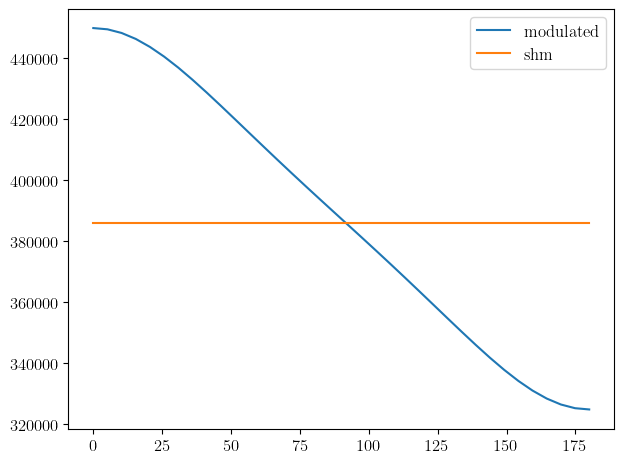

took 0.3870258331298828s


In [23]:
test_mX = 1.
test_cs = 1e-34
dmrates.update_crosssection(test_cs)
FDMn = 2
isoangles = np.linspace(0,180,36)
rate_per_angle = np.zeros(36)
rate_flat = np.zeros(36)
import time
start = time.time()
for isoangle in range(36):
    r = dmrates.calculate_rates(test_mX,'modulated',FDMn,ne=nes,integrate=True,DoScreen=True,isoangle=isoangle,useVerne=True)[ne-1] *nu.kg*nu.year
    rate_per_angle[isoangle] = r.cpu()
    r = dmrates.calculate_rates(test_mX,'shm',FDMn,ne=nes,integrate=True,DoScreen=True,isoangle=None)[ne-1] *nu.kg*nu.year
    rate_flat[isoangle] = r.cpu()
end = time.time()

plt.plot(isoangles,rate_per_angle,label='modulated')
plt.plot(isoangles,rate_flat,label='shm')
plt.legend()
plt.show()
plt.close()
print(f"took {end - start}s")

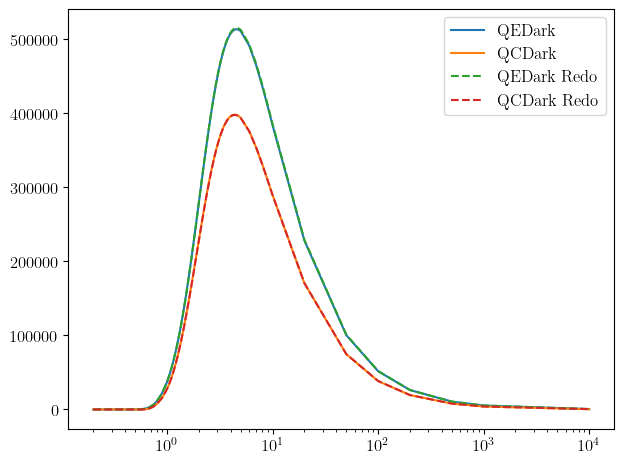

In [9]:
plt.plot(mX_array,qedark_results,label='QEDark')
plt.plot(mX_array,qcdark_results,label='QCDark')
plt.plot(mX_array,qedark_redo,label='QEDark Redo',ls='--')
plt.plot(mX_array,qcdark_redo,label='QCDark Redo',ls='--')

plt.legend()
plt.xscale('log')
# plt.yscale('log')

plt.show()
plt.close()

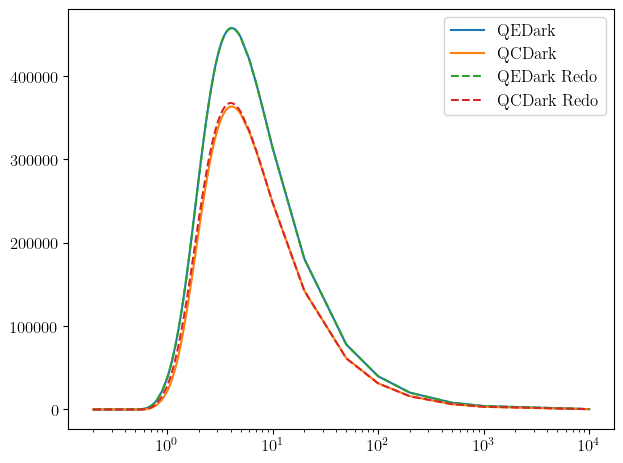

In [10]:
plt.plot(mX_array,qedark_results_step,label='QEDark')
plt.plot(mX_array,qcdark_results_step,label='QCDark')
plt.plot(mX_array,qedark_redo_step,label='QEDark Redo',ls='--')
plt.plot(mX_array,qcdark_redo_step,label='QCDark Redo',ls='--')

plt.legend()
plt.xscale('log')
# plt.yscale('log')

plt.show()
plt.close()

In [1]:
#this is for testing wimprates
import DMeRates
import DMeRates.DMeRate as DMeRate
material = 'Xe'
dmrates = DMeRate.DMeRate(material)
import numpy as np

import numericalunits as nu
from DMeRates.Constants import *


CUDA GPU found, performing calculations on GPU


In [2]:
test_shell = '5p'
test_mX = 1000
test_mX_unitized = test_mX * nu.MeV / nu.c0**2
test_mX_eV = 1000*1e6

test_cs = 1e-34
FDMn = 0
halo_model = 'shm'

dmrates.update_crosssection(test_cs)

dmrates.setup_halo_data(test_mX,FDMn,'shm')

drs = dmrates.noble_dRdE(test_mX,FDMn,halo_model,halo_id_params=None,debug=False,unitize=True)


c:\Users\Ansh\anaconda3\envs\dmerates\Lib\site-packages\torch\__init__.py:1236: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\tensor\python_tensor.cpp:436.)
  _C._set_default_tensor_type(t)
c:\Users\Ansh\anaconda3\envs\dmerates\Lib\site-packages\torch\functional.py:539: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\native\TensorShape.cpp:3638.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [3]:
dr_5p_res = dmrates.rate_dme_shell(test_mX_unitized,FDMn,halo_model,test_shell,unitize=True,debug=True)

tensor([[0.0000e+00, 1.5270e-17]])
returning debug output:
integrated_result,prefactor,fdm_factor,ff_arr,etas,qArr,qmin,qmax


In [4]:
import sys
sys.path.append('wimprates_mod')
from wimprates_ansh import rate_dme,rate_dme_sum,dRdE,years_per_day,dRdne
erec = dmrates.Earr.cpu().numpy() / nu.eV
drs_old = dRdE(test_mX,test_cs,FDMn,e_er = None,isoangle = None,mat = material,useVerne = True,verbose=False,integrate=False)
# years_per_day


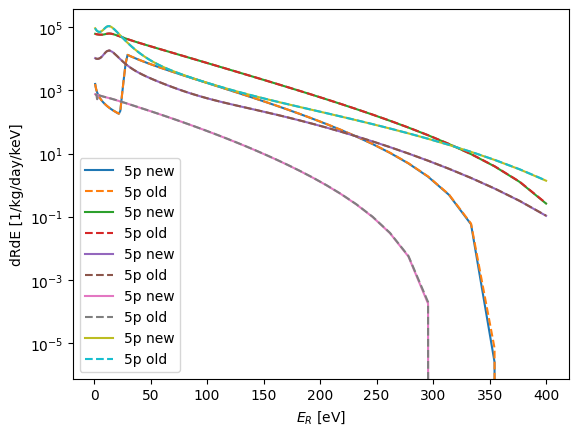

In [5]:
import matplotlib.pyplot as plt
import numericalunits as nu
for shell in dmrates.form_factor.keys:
    if shell in skip_keys[material]:
        continue
    plt.plot(erec,drs[shell].cpu(),label=f"{test_shell} new")
    plt.plot(erec,drs_old[shell]*years_per_day,label=f"{test_shell} old",ls='--')

plt.yscale('log')
plt.xlabel('$E_R$ [eV]')
plt.legend()
plt.ylabel("dRdE [1/kg/day/keV]")
plt.show()
plt.close()


In [6]:
import torch
nes = torch.arange(1,17)
n_el, drsrates_old = dRdne(test_mX,test_cs,FDMn,e_er = None,isoangle=None,material='Xe',maxne = int(torch.max(nes)),ne='All',return_shells=True,useVerne=True,verbose=False,integrate=False)
n_el, drsn_old_sun = dRdne(test_mX,test_cs,FDMn,e_er = None,isoangle=None,material='Xe',maxne = int(torch.max(nes)),ne='All',return_shells=False,useVerne=True,verbose=False,integrate=False)
drsn_old_sun[1]

np.float64(559998606.7200326)

In [7]:
import time
start = time.time()
rates_new_allsum = dmrates.calculate_nobleGas_rates(test_mX,halo_model,FDMn,nes,isoangle=None,halo_id_params=None,useVerne=False,calcErrors=None,debug=False,returnShells=False)

rates_new_all,shells = dmrates.calculate_nobleGas_rates(test_mX,halo_model,FDMn,nes,isoangle=None,halo_id_params=None,useVerne=False,calcErrors=None,debug=False,returnShells=True)
end = time.time()
print(f"took {end-start}s")
shells

took 0.285480260848999s


['Summed', '4p', '4d', '5s', '4s', '5p']

In [8]:
import time
start = time.time()
for isoangle in range(36):
    dmrates.setup_halo_data(test_mX,FDMn,'modulated',isoangle=35,useVerne=True)
    drs = dmrates.noble_dRdE(test_mX,FDMn,'modulated',halo_id_params=None,debug=False,unitize=True)

    rates_new_allsum = dmrates.calculate_nobleGas_rates(test_mX,halo_model,FDMn,nes,isoangle=isoangle,halo_id_params=None,useVerne=True,calcErrors=None,debug=False,returnShells=False)
end = time.time()
print(f"took {end-start}s")

took 1.012620210647583s


<>:4: SyntaxWarning: invalid escape sequence '\c'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\c'
<>:4: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Ansh\AppData\Local\Temp\ipykernel_50992\744520448.py:4: SyntaxWarning: invalid escape sequence '\c'
  title = f"$m_\chi$ = {test_mX} MeV/c$^2$, $\sigma_e =$ {test_cs} cm$^2$, FDM = {fdm_str}"
C:\Users\Ansh\AppData\Local\Temp\ipykernel_50992\744520448.py:4: SyntaxWarning: invalid escape sequence '\s'
  title = f"$m_\chi$ = {test_mX} MeV/c$^2$, $\sigma_e =$ {test_cs} cm$^2$, FDM = {fdm_str}"


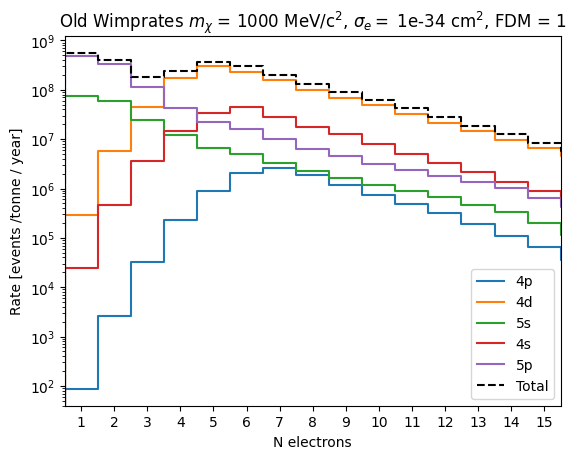

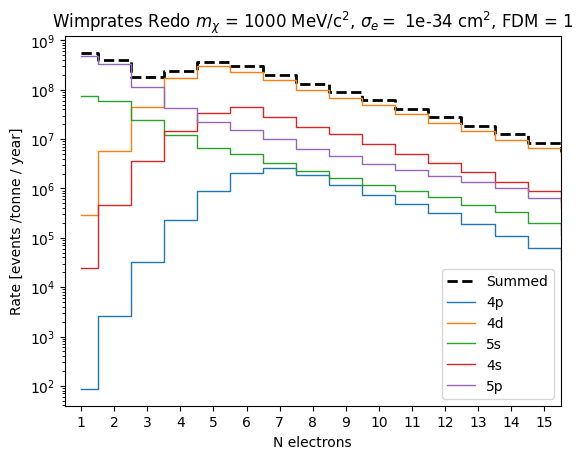

In [9]:
fdm_dict = {0: '1',
            2: '$1/q^2$'}
fdm_str = fdm_dict[FDMn]
title = f"$m_\chi$ = {test_mX} MeV/c$^2$, $\sigma_e =$ {test_cs} cm$^2$, FDM = {fdm_str}" 

plt.title('Old Wimprates '+title)# + (' -- SWAP 4s<->4p' if True else ''))
drsrates_old
for shell, rn in drsrates_old.items():
        plt.plot(n_el, np.array(rn), drawstyle='steps-mid', label=shell)
plt.plot(n_el, np.sum(np.array(list(drsrates_old.values())), axis=0),
            label='Total',
            drawstyle='steps-mid', 
            linestyle='--', 
            c='k')
plt.xticks(np.arange(1, 16))
plt.xlim(0.5, 15.5)
plt.xlabel("N electrons")
plt.legend()
plt.yscale('log')
plt.ylabel(f"Rate [events /tonne / year]")
plt.show()
plt.close()

plt.title('Wimprates Redo ' + title)# + (' -- SWAP 4s<->4p' if True else ''))


for i,key in enumerate(shells):
        ls = '--' if i == 0 else None
        c = 'k' if i ==0 else None
        lw = 2 if i == 0 else 1
        r = rates_new_all[0][:,i] * nu.tonne * nu.year
        r = r.cpu()
        nes = nes.cpu()
        plt.plot(nes,r,drawstyle='steps-mid',label=key,ls=ls,c=c,lw=lw)
plt.xticks(np.arange(1, 16))
plt.xlim(0.5, 15.5)
plt.xlabel("N electrons")
plt.legend()
plt.yscale('log')
plt.ylabel(f"Rate [events /tonne / year]")

plt.show()
plt.close()

In [10]:
import os
from numpy import loadtxt
from torchinterp1d import interp1d
ne = [1,2,3,4,5,6,7,8,9,10]
filepath = os.path.join(dmrates.module_dir,'p100k.dat')
p100data = loadtxt(filepath)
pEV = torch.tensor(p100data[:,0]) *nu.eV
file_probabilities = torch.tensor(p100data.T)#[:,:]
file_probabilities = file_probabilities
print(file_probabilities.shape)
print(pEV.shape)

probabilities = interp1d(pEV, file_probabilities,dmrates.Earr)
probabilities.shape

torch.Size([21, 979])
torch.Size([979])


torch.Size([1, 100])